In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook', font_scale=1.4)

In [191]:
df = pd.read_csv('results/bernoulli.csv')
df = df.rename(columns=lambda x: '_'.join(reversed(x.split('_'))))
df = pd.wide_to_long(df, stubnames=['steps', 'val'], i=['cost_sample', 'cost_switch'], j='method', sep='_', suffix='.*').reset_index()
df.steps -= 1 # drop termination 
df.head()
df.cost_sample = df.cost_sample.round(4)

## Return

Text(0.5, 0, 'Switch Cost')

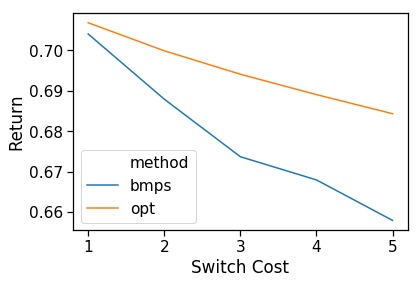

In [211]:
sns.lineplot('cost_switch', 'val', data=df, hue='method', ci=None)
plt.ylabel('Return');
plt.xlabel('Switch Cost')

Text(0.5, 0, 'Switch Cost')

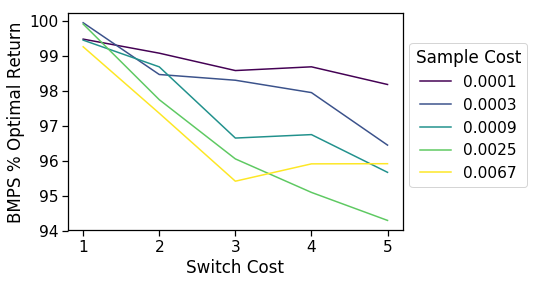

In [206]:
x = df.set_index(['method', 'cost_switch', 'cost_sample']).sort_index()
d = (x.loc['bmps'] / x.loc['opt'])
(d.val.unstack() * 100).plot(cmap='viridis')
plt.legend(loc=(1.02, 0.2), title='Sample Cost');
plt.ylabel('BMPS % Optimal Return')
plt.xlabel('Switch Cost')

## Number of steps

Text(0, 0.5, 'Number of Samples')

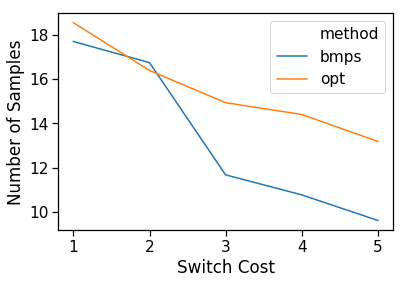

In [202]:
sns.lineplot('cost_switch', 'steps', data=df, hue='method', ci=None);
plt.xlabel('Switch Cost')
plt.ylabel('Number of Samples')

Text(0.5, 0, 'Switch Cost')

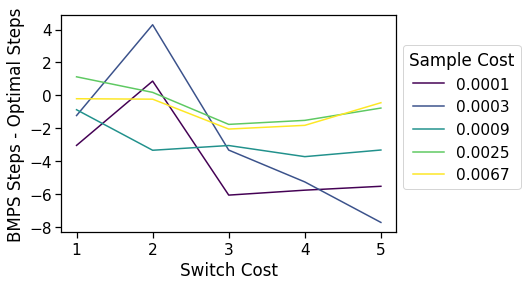

In [198]:
d = (x.loc['bmps'] - x.loc['opt'])
d.steps.unstack().plot(cmap='viridis')
plt.legend(loc=(1.02, 0.2), title='Sample Cost');
plt.ylabel('BMPS Steps - Optimal Steps')
plt.xlabel('Switch Cost')